In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import pyrsm as rsm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_stata('karlan_list_2007.dta')

In [2]:
test_variables = ['hpa', 'freq', 'female', 'redcty', 'bluecty']

for var in test_variables:
    control = df.loc[df.treatment == 0, var].dropna()
    treatment = df.loc[df.treatment == 1, var].dropna()

    t_stat, pval = ttest_ind(control, treatment)
    print(f'''
    t-statistic: {t_stat}
    p-value: {pval}
    At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} 
    the null hypothesis that the mean {var} 
    of the two samples are equal.''')

    m = rsm.model.regress(data=df,
                      rvar=var,
                      evar=['treatment'],
    )
    print(f'Linear regression results for {var}:')
    print(m.summary(main=False))


    t-statistic: -0.944145044786662
    p-value: 0.34510008823759086
    At the 95% confidence level, we fail to reject 
    the null hypothesis that the mean hpa 
    of the two samples are equal.
Linear regression results for hpa:

R-squared: 0.0, Adjusted R-squared: -0.0
F-statistic: 0.891 df(1, 50081), p.value 0.345
Nr obs: 50,083
None

    t-statistic: 0.11089297035979982
    p-value: 0.9117016644344591
    At the 95% confidence level, we fail to reject 
    the null hypothesis that the mean freq 
    of the two samples are equal.
Linear regression results for freq:

R-squared: 0.0, Adjusted R-squared: -0.0
F-statistic: 0.012 df(1, 50081), p.value 0.912
Nr obs: 50,083
None

    t-statistic: 1.7583691871450704
    p-value: 0.07869095826986476
    At the 95% confidence level, we fail to reject 
    the null hypothesis that the mean female 
    of the two samples are equal.
Linear regression results for female:

R-squared: 0.0, Adjusted R-squared: 0.0
F-statistic: 3.092 df(1, 48970)

The results of the t-test and linear regression analysis on these explanatory variables affirm that that treatment and control groups are not statistically significantly different, at the 95% confidence level.

treatment
Control      0.017858
Treatment    0.022039
Name: gave, dtype: float64

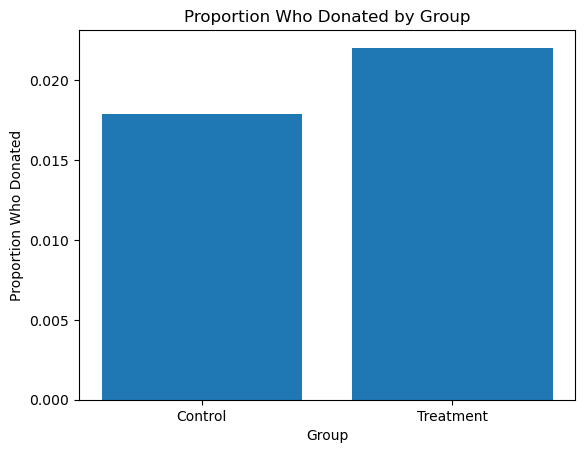

In [3]:
gave_df = df.groupby('treatment')['gave'].mean()
gave_df.index = gave_df.index.map({0: 'Control', 1: 'Treatment'})

plt.bar(gave_df.index, gave_df.values)
plt.title('Proportion Who Donated by Group')
plt.xlabel('Group')
plt.ylabel('Proportion Who Donated')
display(gave_df)
plt.show()


In [4]:
control = df.loc[df.treatment == 0, 'gave'].dropna()
treatment = df.loc[df.treatment == 1, 'gave'].dropna()

t_stat, pval = ttest_ind(control, treatment)

print(f'''
t-statistic: {t_stat}
p-value: {pval}

At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} the null hypothesis 
that the response rate of the two samples are equal.''')


t-statistic: -3.101361000543946
p-value: 0.0019274025949016982

At the 95% confidence level, we reject the null hypothesis 
that the response rate of the two samples are equal.


In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

probit_model = smf.probit('gave ~ treatment', data=df).fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50081
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:               0.0009783
Time:                        17:53:15   Log-Likelihood:                -5030.5
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                  0.001696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1001      0.023    -90.073      0.000      -2.146      -2.054
treatment      0.0868      0.

Given the low p-value from both the t-test and probit regression, we can conclude that people are more likely to respond to a request for charitable donations when informed that their donations will be met with a matching donation. 

In [6]:
df['ratio'] = df['ratio'].astype(str)
df['ratio'] = pd.Categorical(df['ratio'], categories=['Control', '1', '2', '3'], ordered=True)

In [7]:
ratio_df = df.groupby('ratio')['gave'].mean()
display(ratio_df)

/tmp/ipykernel_9566/157019139.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = df.groupby('ratio')['gave'].mean()


ratio
Control    0.017858
1          0.020749
2          0.022633
3          0.022733
Name: gave, dtype: float64

In [8]:
g1 = '1'
g2 = '2'

group1 = df.loc[df.ratio == g1, 'gave'].dropna()
group2 = df.loc[df.ratio == g2, 'gave'].dropna()

t_stat, pval = ttest_ind(group1, group2)
print(f'''
    Response rate for {g1}:1 - {group1.mean()}
    Response rate for {g2}:1 - {group2.mean()}
    t-statistic: {t_stat}
    p-value: {pval}

    At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} 
    the null hypothesis that the response rate of ratio {g1}:1 and {g2}:1 are equal.''')


    Response rate for 1:1 - 0.020749124225276205
    Response rate for 2:1 - 0.0226333752469912
    t-statistic: -0.96504713432247
    p-value: 0.33453168549723933

    At the 95% confidence level, we fail to reject 
    the null hypothesis that the response rate of ratio 1:1 and 2:1 are equal.


In [9]:
g1 = '2'
g2 = '3'

group1 = df.loc[df.ratio == g1, 'gave'].dropna()
group2 = df.loc[df.ratio == g2, 'gave'].dropna()

t_stat, pval = ttest_ind(group1, group2)
print(f'''
    Response rate for {g1}:1 - {group1.mean()}
    Response rate for {g2}:1 - {group2.mean()}
    t-statistic: {t_stat}
    p-value: {pval}

    At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} 
    the null hypothesis that the response rate of ratio {g1}:1 and {g2}:1 are equal.''')


    Response rate for 2:1 - 0.0226333752469912
    Response rate for 3:1 - 0.022733399227244138
    t-statistic: -0.05011583793874515
    p-value: 0.9600305283739325

    At the 95% confidence level, we fail to reject 
    the null hypothesis that the response rate of ratio 2:1 and 3:1 are equal.


In [10]:
g1 = '1'
g2 = '3'

group1 = df.loc[df.ratio == g1, 'gave'].dropna()
group2 = df.loc[df.ratio == g2, 'gave'].dropna()

t_stat, pval = ttest_ind(group1, group2)
print(f'''
    Response rate for {g1}:1 - {group1.mean()}
    Response rate for {g2}:1 - {group2.mean()}
    t-statistic: {t_stat}
    p-value: {pval}

    At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} 
    the null hypothesis that the response rate of ratio {g1}:1 and {g2}:1 are equal.''')


    Response rate for 1:1 - 0.020749124225276205
    Response rate for 3:1 - 0.022733399227244138
    t-statistic: -1.0150255853798622
    p-value: 0.3101046637086672

    At the 95% confidence level, we fail to reject 
    the null hypothesis that the response rate of ratio 1:1 and 3:1 are equal.


In [11]:
probit_model2 = smf.probit('gave ~ ratio', data=df).fit()
print(probit_model2.summary())

Optimization terminated successfully.
         Current function value: 0.100430
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50079
Method:                           MLE   Df Model:                            3
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                0.001108
Time:                        17:53:16   Log-Likelihood:                -5029.8
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                   0.01091
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1001      0.023    -90.073      0.000      -2.146      -2.054
ratio[T.1]     0.0616      0.

In [12]:
treatment_df = df.loc[df.treatment == 1].copy()
treatment_df = treatment_df[['gave', 'ratio']].dropna()
treatment_df['ratio'] = pd.Categorical(
    treatment_df['ratio'], 
    categories=['1', '2', '3'], 
    ordered=True
)
print(treatment_df.groupby('ratio', observed=True)['gave'].mean())

probit_model3 = smf.probit('gave ~ ratio', data=treatment_df).fit()
print(probit_model3.summary())

ratio
1    0.020749
2    0.022633
3    0.022733
Name: gave, dtype: float64
Optimization terminated successfully.
         Current function value: 0.105851
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                33396
Model:                         Probit   Df Residuals:                    33393
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:               0.0001844
Time:                        17:53:16   Log-Likelihood:                -3535.0
converged:                       True   LL-Null:                       -3535.6
Covariance Type:            nonrobust   LLR p-value:                    0.5211
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0385      0.027 

In [13]:
print(f'Difference between 3:1 response rate and 2:1 response rate: {ratio_df['3'] - ratio_df['2']}')
print(f'Difference between 2:1 response rate and 1:1 response rate: {ratio_df['2'] - ratio_df['1']}')


Difference between 3:1 response rate and 2:1 response rate: 0.00010002398025293902
Difference between 2:1 response rate and 1:1 response rate: 0.0018842510217149944


In [14]:
coefs = probit_model2.params

# Coefficients: interpreted as difference from 'Control'
coef_1 = coefs['ratio[T.1]']
coef_2 = coefs['ratio[T.2]']
coef_3 = coefs['ratio[T.3]']

# Compute pairwise differences between levels
diff_3_vs_2 = coef_3 - coef_2
diff_2_vs_1 = coef_2 - coef_1

print(f"3:1 vs 2:1 difference (from regression): {diff_3_vs_2:.4f}")
print(f"2:1 vs 1:1 difference (from regression): {diff_2_vs_1:.4f}")


3:1 vs 2:1 difference (from regression): 0.0019
2:1 vs 1:1 difference (from regression): 0.0363


In [15]:
mfx = probit_model2.get_margeff()
print(mfx.summary())

       Probit Marginal Effects       
Dep. Variable:                   gave
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ratio[T.1]     0.0031      0.002      1.724      0.085      -0.000       0.007
ratio[T.2]     0.0049      0.002      2.786      0.005       0.001       0.008
ratio[T.3]     0.0050      0.002      2.841      0.004       0.002       0.008


In [16]:
marginal_effects = mfx.margeff
print("Marginal effects by ratio level:", marginal_effects)

# Compare 2:1 to 1:1, 3:1 to 2:1
diff_2_vs_1 = marginal_effects[1] - marginal_effects[0]
diff_3_vs_2 = marginal_effects[2] - marginal_effects[1]

print(f"Estimated increase from 1:1 to 2:1: {diff_2_vs_1:.4f}")
print(f"Estimated increase from 2:1 to 3:1: {diff_3_vs_2:.4f}")

Marginal effects by ratio level: [0.0030624  0.0048688  0.00496109]
Estimated increase from 1:1 to 2:1: 0.0018
Estimated increase from 2:1 to 3:1: 0.0001


In [17]:
control = df.loc[df.treatment == 0, 'amount'].dropna()
treatment = df.loc[df.treatment == 1, 'amount'].dropna()

t_stat, pval = ttest_ind(control, treatment)

print(f'''
t-statistic: {t_stat}
p-value: {pval}

At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} the null hypothesis 
that the donation amount of the two samples are equal.''')


t-statistic: -1.8605020225753781
p-value: 0.06282038947470686

At the 95% confidence level, we fail to reject the null hypothesis 
that the donation amount of the two samples are equal.


In [18]:
control = df.loc[(df.treatment == 0) & (df.gave == 1), 'amount'].dropna()
treatment = df.loc[(df.treatment == 1) & (df.gave == 1), 'amount'].dropna()

t_stat, pval = ttest_ind(control, treatment)

print(f'''
t-statistic: {t_stat}
p-value: {pval}

At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} the null hypothesis 
that the donation amount of the two samples are equal.''')


t-statistic: 0.5808388615237938
p-value: 0.5614758782284279

At the 95% confidence level, we fail to reject the null hypothesis 
that the donation amount of the two samples are equal.


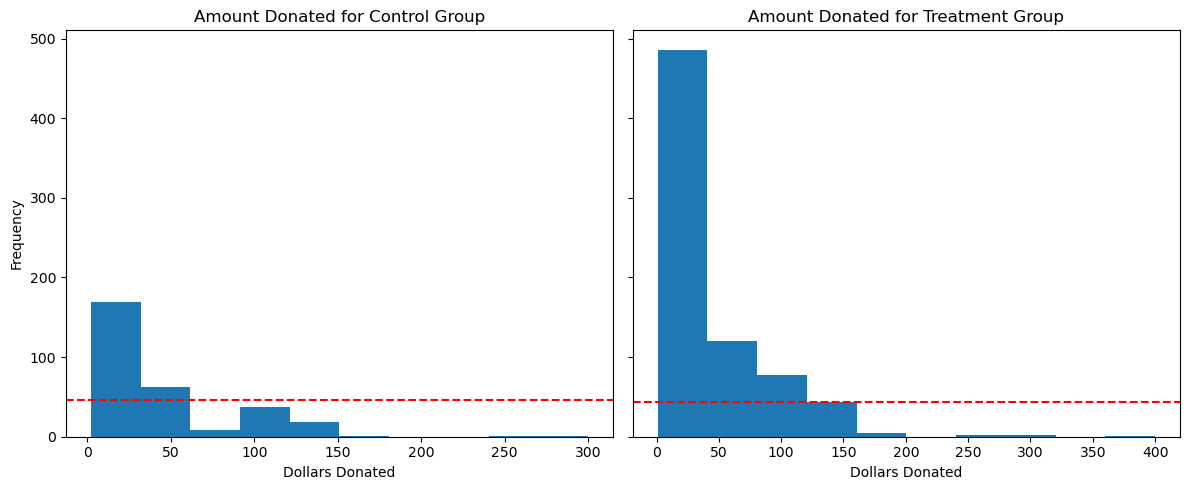

In [33]:
donated_treatment = df.loc[(df.gave == 1) & (df.treatment == 1)].copy()
donated_control = df.loc[(df.gave == 1) & (df.treatment == 0)].copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].set_ylabel("Frequency")

for val in [0, 1]:
    subset = df.loc[(df.gave == 1) & (df.treatment == val)].copy()
    axes[val].hist(subset['amount'], bins=10)
    axes[val].axhline(y=subset['amount'].mean(), color='r', linestyle='--')
    axes[val].set_title(f'Amount Donated for {"Treatment" if val == 1 else "Control"} Group')
    axes[val].set_xlabel("Dollars Donated")

plt.tight_layout()
plt.show()


In [ ]:
ctr_p = 0.018
trt_p = 0.022

sim_ctr = np.random.binomial(n=1, p=ctr_p, size=10_000)
sim_trt = np.random.binomial(n=1, p=trt_p, size=10_000)

sim_diff = sim_trt - sim_ctr
sim_diff_mean = sim_trt.mean() - sim_ctr.mean()

print(sim_diff.mean())
print(sim_diff_mean)

0.0012
0.0012000000000000031


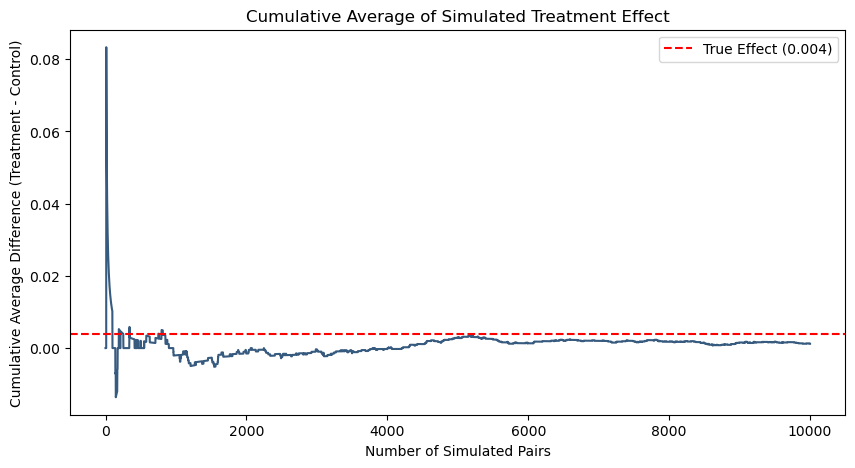

In [113]:
cumulative_avg = np.cumsum(sim_diff) / np.arange(1, len(sim_diff) + 1)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(cumulative_avg)
plt.axhline(y=trt_p - ctr_p, color='red', linestyle='--', label='True Effect (0.004)')
plt.title('Cumulative Average of Simulated Treatment Effect')
plt.xlabel('Number of Simulated Pairs')
plt.ylabel('Cumulative Average Difference (Treatment - Control)')
plt.legend()

plt.show()

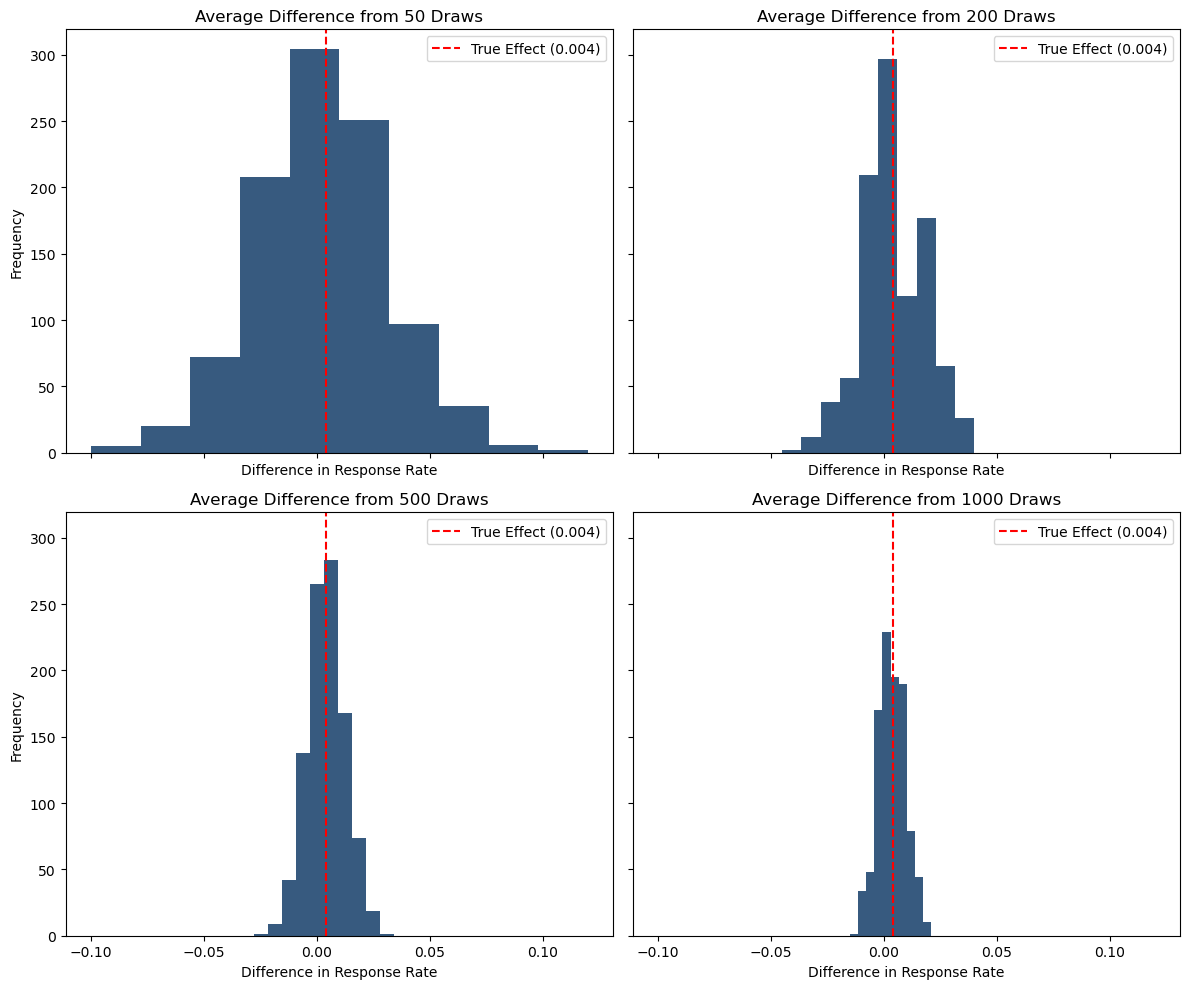

In [112]:
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=['#375a7f']) 


fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True, sharex=True)
axes = axes.flatten()
axes[0].set_ylabel("Frequency")
axes[2].set_ylabel("Frequency")

for ax, size in enumerate([50, 200, 500, 1000]):
    samples = []
    for i in range(1000):
        sim_ctr = np.random.binomial(n=1, p=ctr_p, size=size)
        sim_trt = np.random.binomial(n=1, p=trt_p, size=size)

        sim_diff_mean = sim_trt.mean() - sim_ctr.mean()
        samples.append(sim_diff_mean)
    
    axes[ax].hist(samples, bins=10)
    axes[ax].axvline(x=trt_p - ctr_p, color='red', linestyle='--', label='True Effect (0.004)')
    axes[ax].legend()
    axes[ax].set_title(f'Average Difference from {size} Draws')
    axes[ax].set_xlabel("Difference in Response Rate")


plt.tight_layout()
plt.show()
